In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

> In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

El target es predecir si la transaccion es fraudulenta o no

In [2]:
train_identity = pd.read_csv('./ieee-fraud-detection/train_identity.csv')

train_transaction = pd.read_csv('./ieee-fraud-detection/train_transaction.csv',
                                usecols=['TransactionID','isFraud'])

In [3]:
display(train_identity)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,"70,787.00",nan,nan,nan,nan,nan,nan,nan,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,"98,945.00",nan,nan,0.00,-5.00,nan,nan,nan,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,"191,631.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.00,"221,832.00",nan,nan,0.00,-6.00,nan,nan,nan,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.00,"7,460.00",0.00,0.00,1.00,0.00,nan,nan,0.00,...,chrome 62.0,24.00,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.00,"145,955.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,chrome 66.0 for android,nan,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.00,"172,059.00",nan,nan,1.00,-5.00,nan,nan,nan,...,chrome 55.0 for android,32.00,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.00,"632,381.00",nan,nan,-1.00,-36.00,nan,nan,nan,...,chrome 65.0 for android,nan,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.00,"55,528.00",0.00,0.00,0.00,-7.00,nan,nan,0.00,...,chrome 66.0,24.00,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [4]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

# Le agrego el target a cada transaction ID

Agrego a cada transaccion si fue fraudulenta y determino que correlaciones existen entre los targets y los labels disponibles

In [5]:
train_identity_with_target = train_identity.merge(train_transaction, how='left', on='TransactionID')

In [6]:
train_identity_with_target.corr()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,isFraud
TransactionID,1.00,-0.09,0.17,-0.02,-0.00,-0.06,-0.03,-0.12,0.04,-0.03,...,0.11,-0.02,0.08,-0.03,0.05,-0.04,0.02,0.01,-0.07,0.09
id_01,-0.09,1.00,-0.14,0.02,0.04,0.01,0.20,0.11,0.10,0.03,...,-0.02,0.00,-0.07,-0.17,0.01,-0.13,-0.04,-0.07,-0.00,-0.12
id_02,0.17,-0.14,1.00,-0.02,0.00,-0.10,-0.05,-0.00,0.01,-0.02,...,0.14,-0.09,0.11,-0.01,0.19,0.04,0.02,0.07,0.13,0.05
id_03,-0.02,0.02,-0.02,1.00,0.34,0.03,0.06,0.02,0.06,0.71,...,0.01,-0.01,0.00,0.07,0.07,-0.02,-0.02,0.03,-0.01,0.04
id_04,-0.00,0.04,0.00,0.34,1.00,-0.03,0.08,0.04,0.05,0.25,...,0.02,0.02,-0.01,0.01,0.00,-0.07,-0.08,-0.04,0.02,-0.06
id_05,-0.06,0.01,-0.10,0.03,-0.03,1.00,-0.29,0.22,0.01,0.09,...,-0.14,-0.02,-0.06,-0.10,-0.13,-0.01,-0.06,-0.03,0.10,-0.01
id_06,-0.03,0.20,-0.05,0.06,0.08,-0.29,1.00,-0.03,0.33,0.08,...,0.05,0.03,-0.07,0.12,0.13,0.08,-0.05,0.09,-0.09,-0.03
id_07,-0.12,0.11,-0.00,0.02,0.04,0.22,-0.03,1.00,-0.09,0.08,...,-0.16,-0.05,-0.07,-0.19,-0.28,-0.07,0.04,-0.13,0.23,-0.08
id_08,0.04,0.10,0.01,0.06,0.05,0.01,0.33,-0.09,1.00,0.11,...,-0.06,0.05,-0.00,0.09,0.14,-0.01,-0.00,0.04,-0.02,-0.06
id_09,-0.03,0.03,-0.02,0.71,0.25,0.09,0.08,0.08,0.11,1.00,...,-0.02,-0.01,-0.01,0.04,0.03,-0.01,0.00,-0.05,-0.03,0.03


In [7]:
train_identity_with_target.corr().iloc[1:-1].isFraud

id_01                  -0.12
id_02                   0.05
id_03                   0.04
id_04                  -0.06
id_05                  -0.01
id_06                  -0.03
id_07                  -0.08
id_08                  -0.06
id_09                   0.03
id_10                   0.01
id_11                   0.01
id_13                  -0.02
id_14                   0.06
id_17                   0.15
id_18                   0.05
id_19                  -0.04
id_20                   0.06
id_21                   0.06
id_22                   0.12
id_24                  -0.00
id_25                   0.03
id_26                   0.10
id_32                   0.07
Name: isFraud, dtype: float64

# Busco correlaciones entre los labels

<AxesSubplot:>

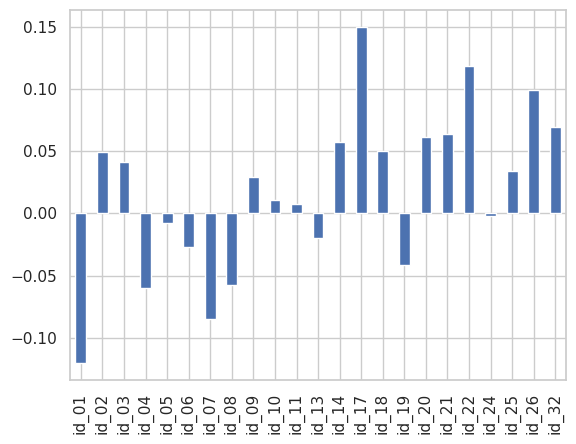

In [8]:
train_identity_with_target.corr().iloc[1:-1].isFraud.plot.bar()

<AxesSubplot:title={'center':'id_17'}, xlabel='isFraud'>

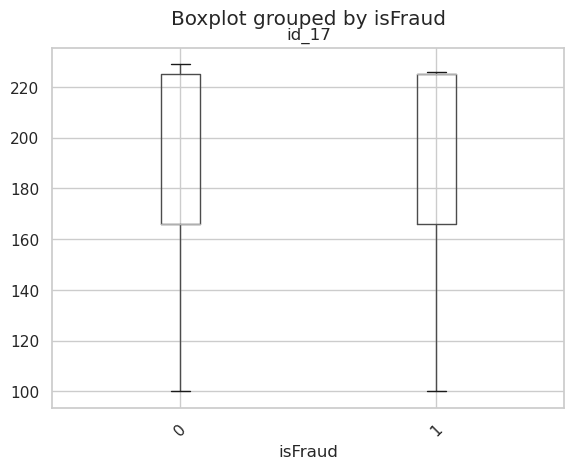

In [9]:
train_identity_with_target.boxplot('id_17','isFraud',meanline=True, rot=45)

Text(0, 0.5, 'Cantidad id_22')

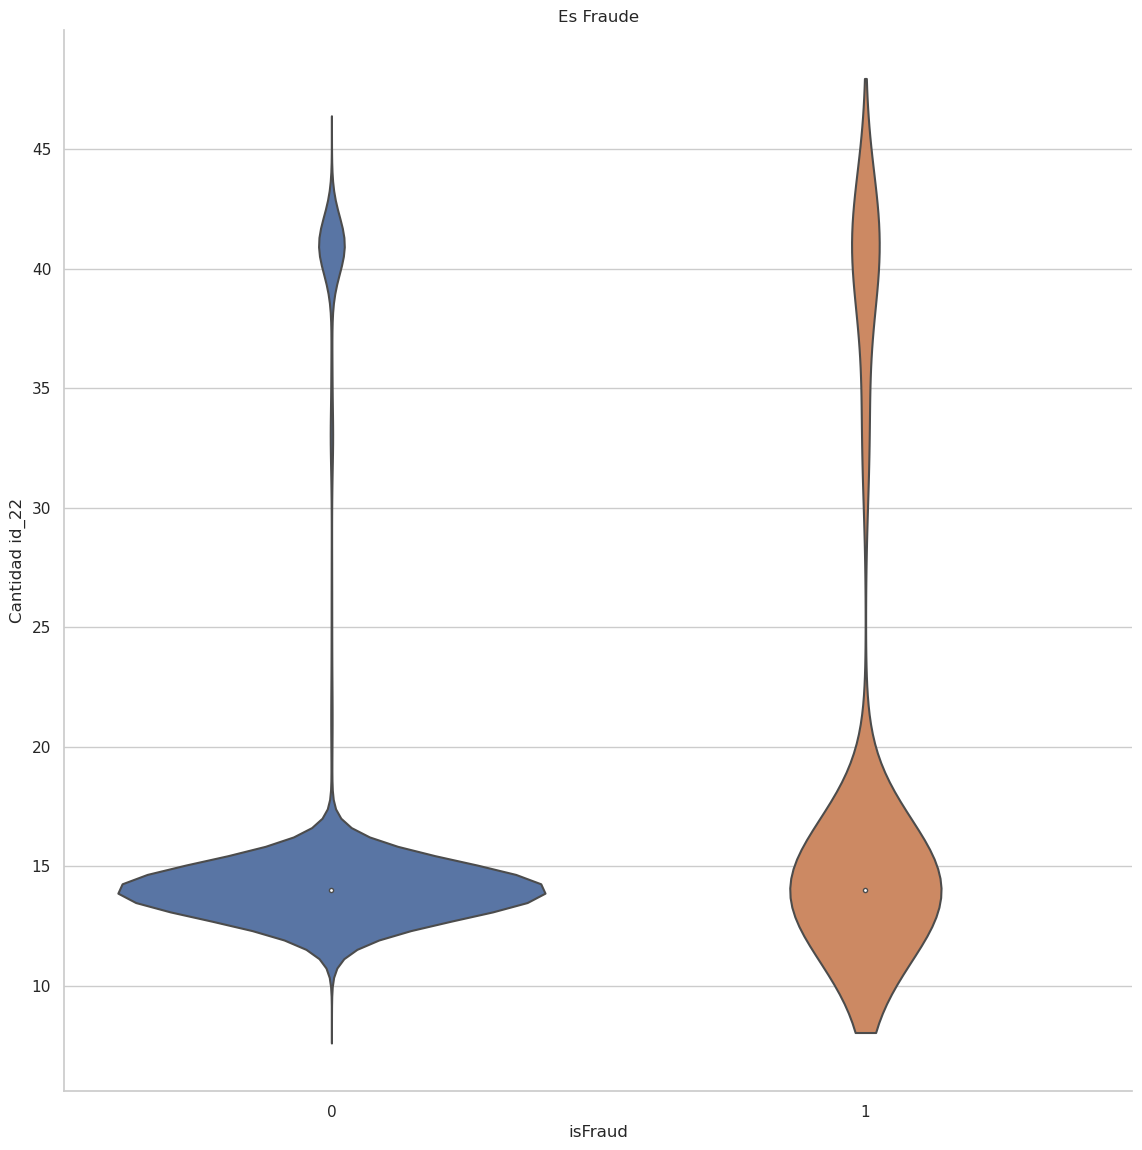

In [10]:
cm = 1/2.54
fig, ax = plt.subplots(1,1, figsize=(35*cm, 35*cm))


sns.violinplot('isFraud','id_22', data=train_identity_with_target, ax=ax)
sns.despine()

ax.set_title("Es Fraude")
ax.set_ylabel("Cantidad id_22")

In [11]:
train_identity_with_target.corr().iloc[1:-1].isFraud

id_01                  -0.12
id_02                   0.05
id_03                   0.04
id_04                  -0.06
id_05                  -0.01
id_06                  -0.03
id_07                  -0.08
id_08                  -0.06
id_09                   0.03
id_10                   0.01
id_11                   0.01
id_13                  -0.02
id_14                   0.06
id_17                   0.15
id_18                   0.05
id_19                  -0.04
id_20                   0.06
id_21                   0.06
id_22                   0.12
id_24                  -0.00
id_25                   0.03
id_26                   0.10
id_32                   0.07
Name: isFraud, dtype: float64

Text(45.046875, 0.5, 'id')

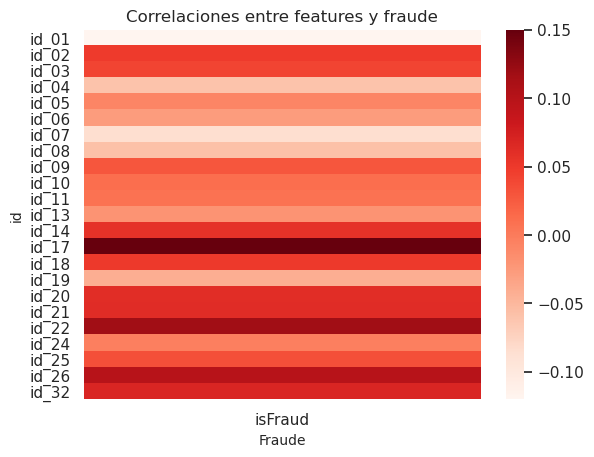

In [12]:
heat_map_db = train_identity_with_target.corr().iloc[1:-1].isFraud.to_frame()

ax = sns.heatmap(heat_map_db, cmap ='Reds')
ax.set_title('Correlaciones entre features y fraude')
ax.set_xlabel ('Fraude', fontsize = 10)
ax.set_ylabel ('id', fontsize = 10)

# Data Adicional

Vemos los valores que se repiten mas por categoria para los registros.

array([[<AxesSubplot:title={'center':'TransactionID'}>,
        <AxesSubplot:title={'center':'id_01'}>,
        <AxesSubplot:title={'center':'id_02'}>,
        <AxesSubplot:title={'center':'id_03'}>,
        <AxesSubplot:title={'center':'id_04'}>],
       [<AxesSubplot:title={'center':'id_05'}>,
        <AxesSubplot:title={'center':'id_06'}>,
        <AxesSubplot:title={'center':'id_07'}>,
        <AxesSubplot:title={'center':'id_08'}>,
        <AxesSubplot:title={'center':'id_09'}>],
       [<AxesSubplot:title={'center':'id_10'}>,
        <AxesSubplot:title={'center':'id_11'}>,
        <AxesSubplot:title={'center':'id_13'}>,
        <AxesSubplot:title={'center':'id_14'}>,
        <AxesSubplot:title={'center':'id_17'}>],
       [<AxesSubplot:title={'center':'id_18'}>,
        <AxesSubplot:title={'center':'id_19'}>,
        <AxesSubplot:title={'center':'id_20'}>,
        <AxesSubplot:title={'center':'id_21'}>,
        <AxesSubplot:title={'center':'id_22'}>],
       [<AxesSubplot:title={

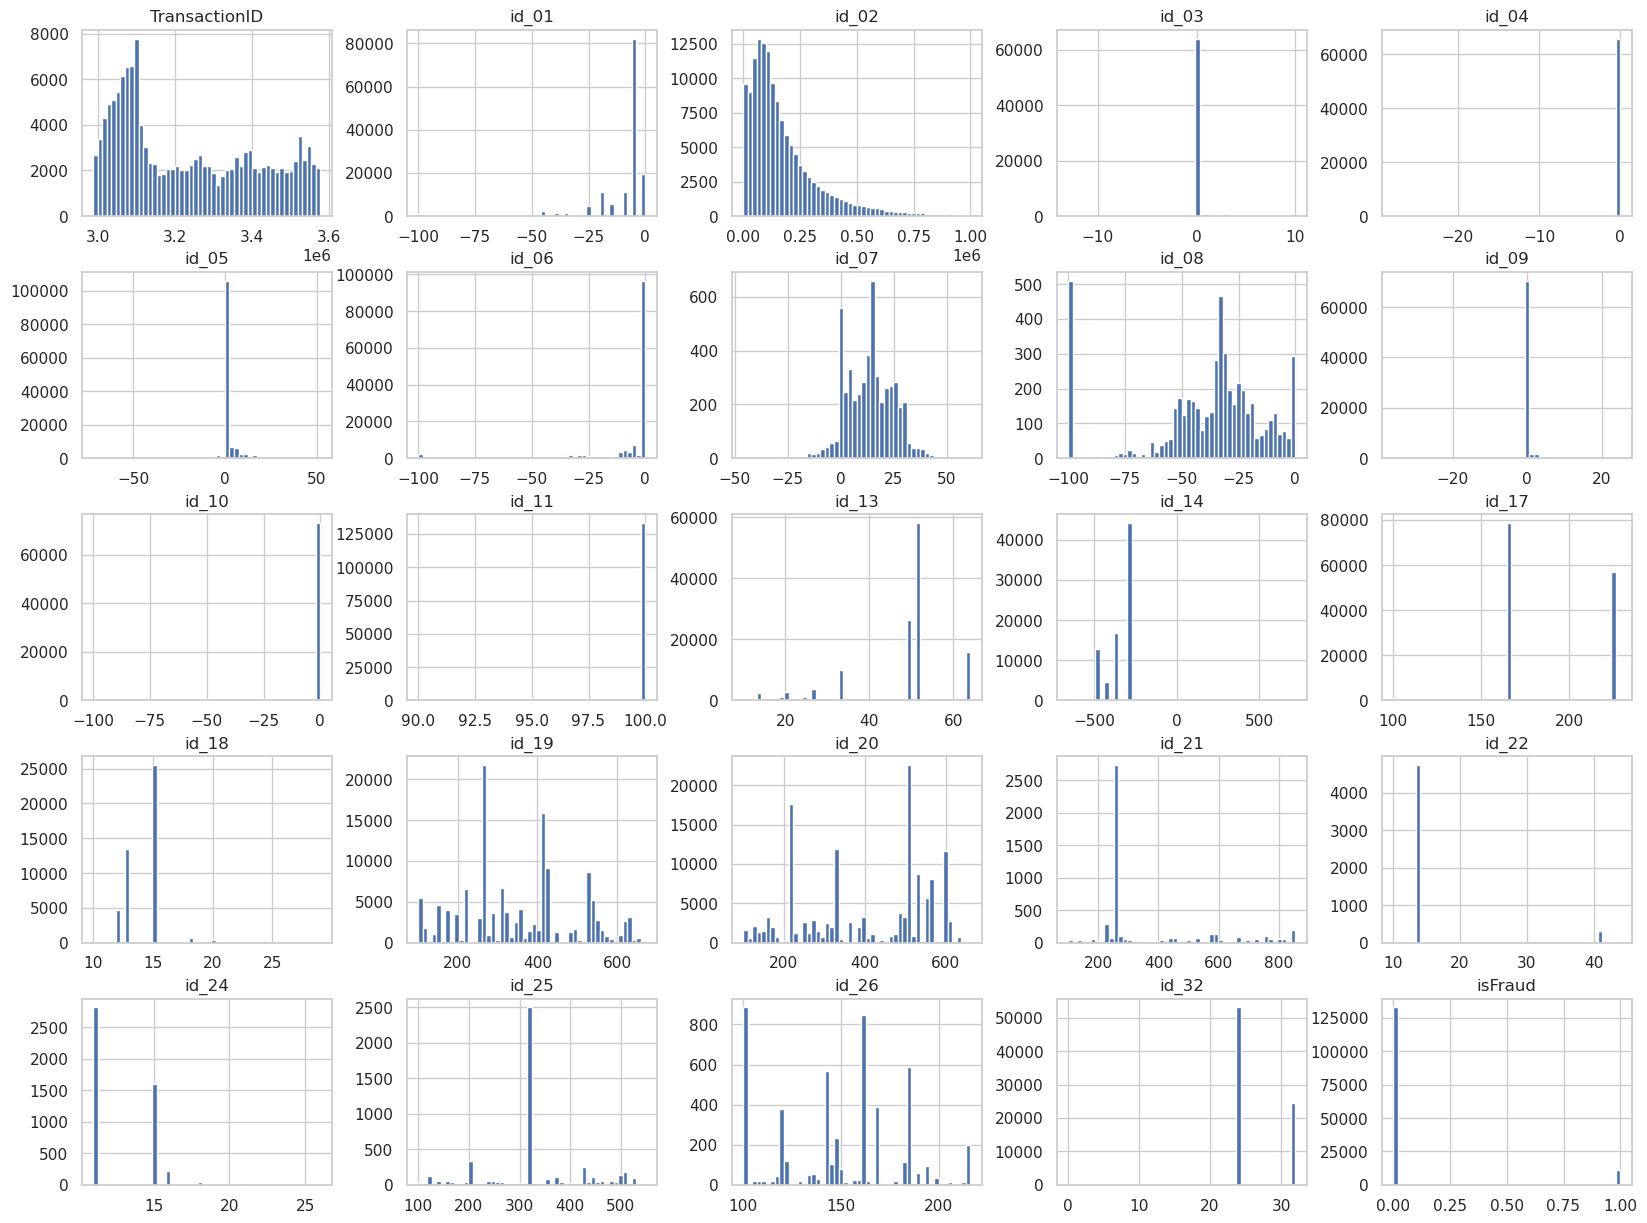

In [13]:
train_identity_with_target.hist(bins=50, figsize=(20,15))

In [14]:
train_identity_with_target.sample(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
137823,3546348,-10.00,"1,686.00",0.00,0.00,nan,nan,nan,nan,0.00,...,nan,NaN,match_status:2,T,F,T,F,desktop,NaN,0
136121,3538856,-20.00,"357,716.00",nan,nan,0.00,0.00,nan,nan,nan,...,nan,NaN,NaN,F,F,T,F,desktop,Windows,0
126274,3493887,-5.00,"157,014.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,24.00,1680x1050,match_status:2,T,F,T,F,desktop,rv:59.0,0
1127,2992722,0.00,"332,503.00",nan,nan,1.00,-23.00,nan,nan,nan,...,nan,NaN,NaN,F,F,T,T,mobile,Moto G (4) Build/NPJ25.93-14.5,0
26607,3059320,-10.00,"59,887.00",nan,nan,1.00,-6.00,nan,nan,nan,...,24.00,1280x1024,match_status:2,T,F,F,T,desktop,Trident/7.0,0
51829,3103113,0.00,"40,911.00",nan,nan,0.00,0.00,nan,nan,nan,...,32.00,2001x1125,match_status:1,T,F,T,T,mobile,iOS Device,0
112466,3415397,0.00,"226,952.00",nan,nan,0.00,0.00,nan,nan,nan,...,24.00,1280x800,match_status:2,T,T,T,T,desktop,Windows,0
100866,3359639,-20.00,"408,674.00",nan,nan,0.00,0.00,nan,nan,nan,...,nan,NaN,NaN,F,F,F,F,mobile,NaN,1
107625,3390898,-5.00,"168,458.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,32.00,2208x1242,match_status:1,T,F,F,F,mobile,iOS Device,0
35990,3077031,-25.00,"129,909.00",nan,nan,7.00,-22.00,nan,nan,nan,...,nan,NaN,NaN,F,F,F,T,mobile,NaN,0


Text(0.5, 1.0, 'Cantidad de Fraude despues de limpiar data')

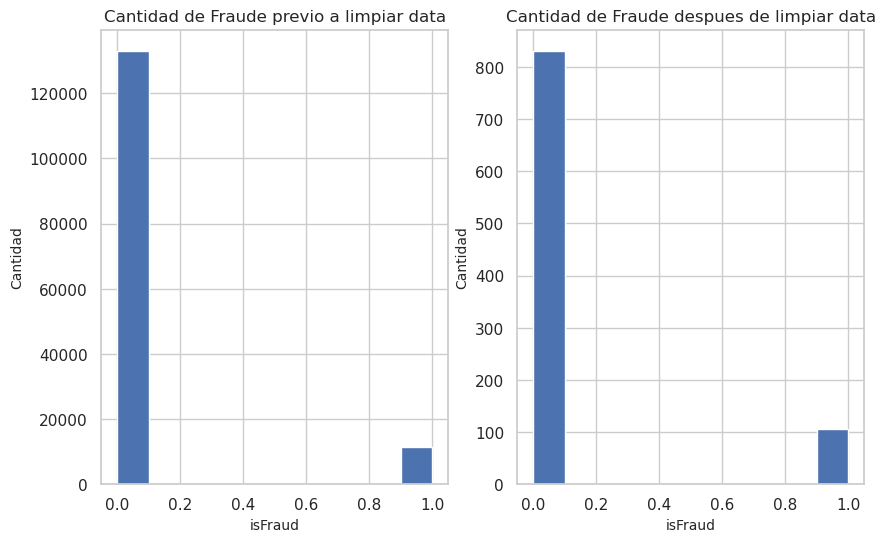

In [15]:
cm = 1/2.54
fig, ax = plt.subplots(1,2, figsize=(25*cm, 15*cm))

ax[0].hist(train_identity_with_target.isFraud)
ax[0].set_xlabel ('isFraud', fontsize = 10)
ax[0].set_ylabel ('Cantidad', fontsize = 10)
ax[0].set_title('Cantidad de Fraude previo a limpiar data')


ax[1].hist(train_identity_with_target.dropna().isFraud)
ax[1].set_xlabel ('isFraud', fontsize = 10)
ax[1].set_ylabel ('Cantidad', fontsize = 10)
ax[1].set_title('Cantidad de Fraude despues de limpiar data')

Vemos que tenemos un problema de clasificacion desbalanceado. Existe una gran cantidad de transacciones que caen en la categoria no fraudulenta (0), por lo tanto no se puede entrenar el modelo con una cantidad aleatoria de registros sino que hay que ser selectivos.

# Que dispositivos se produce la mayor cantidad de fraudes?

Veamos desde que dispositivos se producen la mayor cantidad de fraude

<AxesSubplot:>

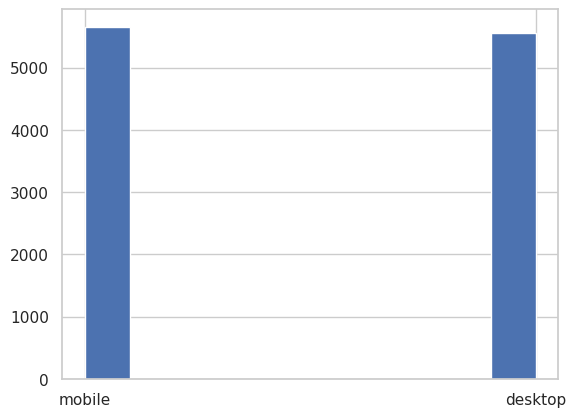

In [16]:
train_identity_with_target[train_identity_with_target.isFraud == 1].DeviceType.hist()

Y desde cuales dispositivos se produce la mayor cantidad de no fraude

<AxesSubplot:>

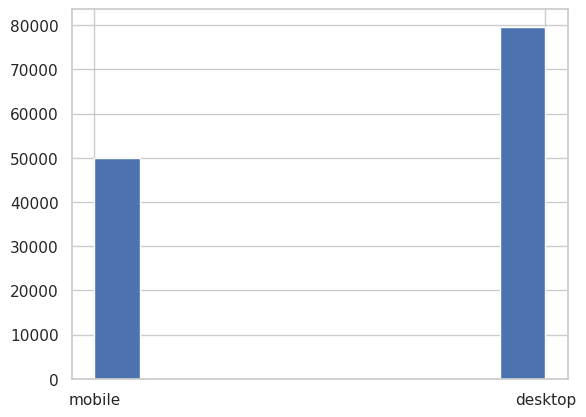

In [17]:
train_identity_with_target[train_identity_with_target.isFraud == 0].DeviceType.hist()

# Relacion entre fraude y tipo de tarjeta


In [18]:
train_transaction = pd.read_csv('./ieee-fraud-detection/train_transaction.csv',
                                usecols=['TransactionAmt','card4','isFraud'])

In [19]:
train_transaction

,isFraud,TransactionAmt,card4
0,0,68.50,discover
1,0,29.00,mastercard
2,0,59.00,visa
3,0,50.00,mastercard
4,0,50.00,mastercard
...,...,...,...
590535,0,49.00,visa
590536,0,39.50,mastercard
590537,0,30.95,mastercard
590538,0,117.00,mastercard


<AxesSubplot:title={'center':'isFraud'}, xlabel='card4'>

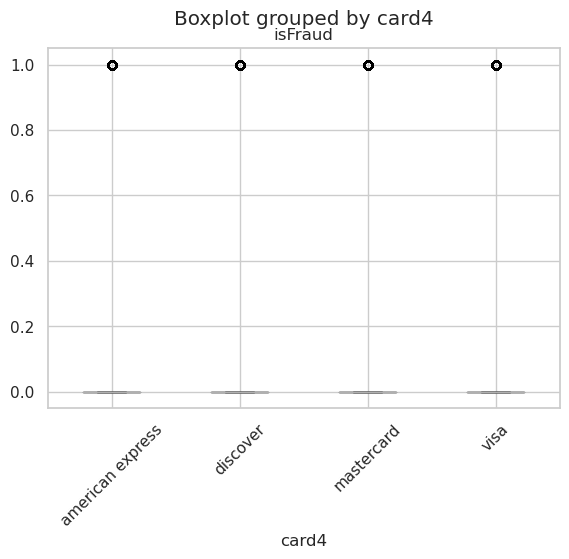

In [20]:
train_transaction.boxplot('isFraud','card4',meanline=True, rot=45)

Text(0, 0.5, 'Es Fraude')

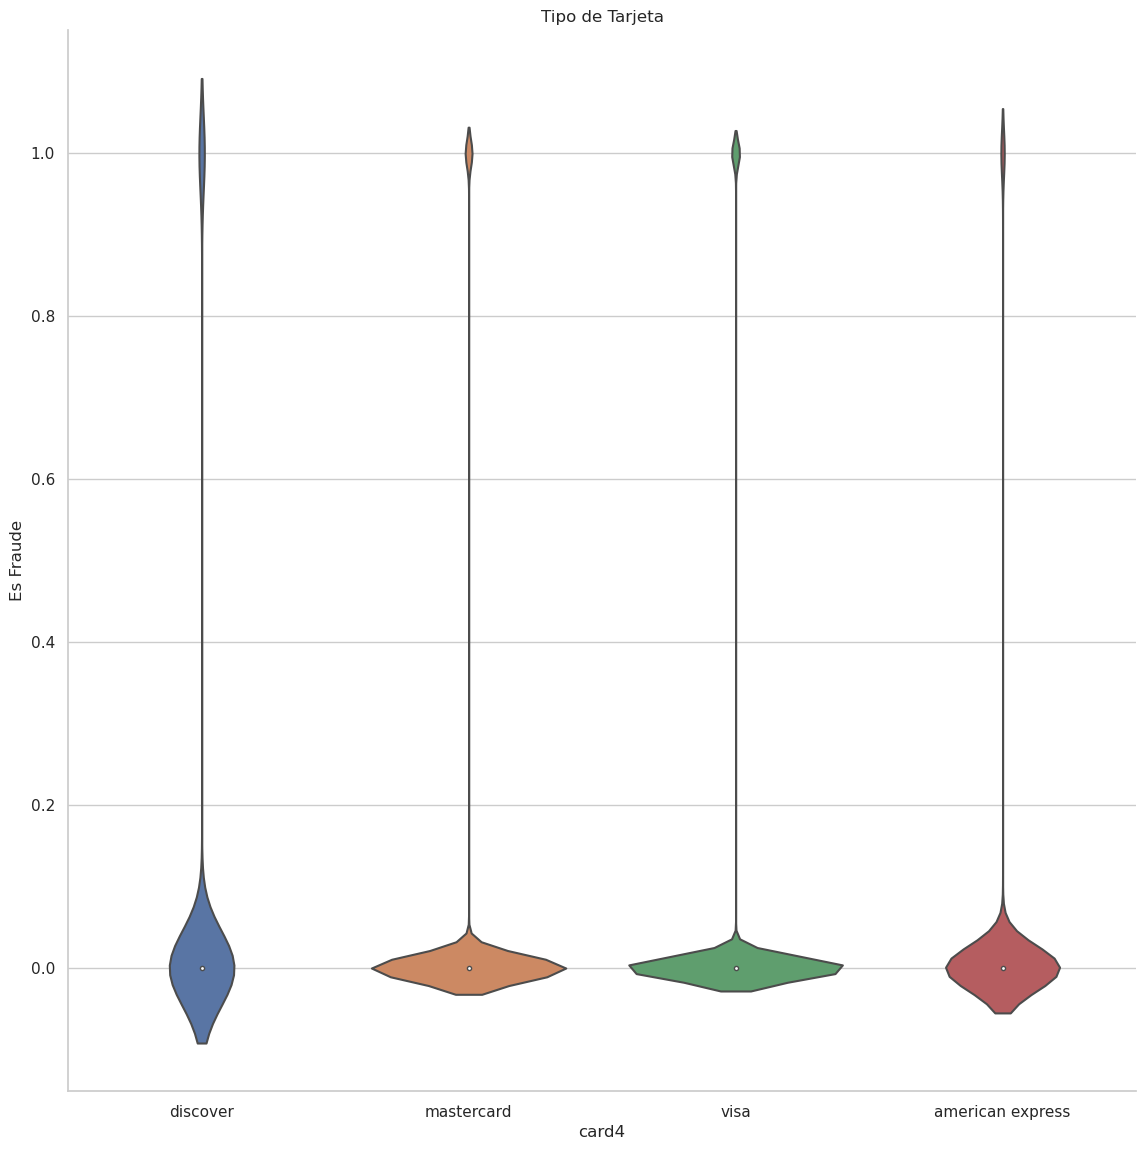

In [21]:
cm = 1/2.54
fig, ax = plt.subplots(1,1, figsize=(35*cm, 35*cm))


sns.violinplot('card4','isFraud', data=train_transaction, ax=ax)
sns.despine()

ax.set_title("Tipo de Tarjeta")
ax.set_ylabel("Es Fraude")